# Classification of Pulsar Stars 


## Introduction:
### Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
The dataset HTRU2 describes a sample of pulsar candidates with multiple observations distinguishing between a pulsar star and a non-pulsar star. The data was collected based on the radio signals transmitted from either an actual pulsar star or random interference radio waves from space. Each observation was then classified as either an actual pulsar star, or something else entirely. Currently, these pulsar stars are used as instruments by scientists by utilizing their pulses of radiation to detect gravitational waves in the galaxy. These gravitational waves are then used to study the extreme states of matter, and find statistics of other heavenly bodies outside of the Earth’s solar system.

We will perform exploratory data analysis and visualizing using the dataset “Pulsar Star Data” retrieved online from https://archive.ics.uci.edu/ml/datasets/HTRU2

### Clearly state the question you will try to answer with your project
Based on the given variables for each observation, is the observation a pulsar star or not?
Identify and describe the dataset that will be used to answer the question
HTRU2.csv 

We will be using every column to distinguish the “class” of each observation.
The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve.


In [8]:
### Run this cell before continuing. 
library(repr)
library(tidyverse)
library(tidymodels)
require(gridExtra)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

## Preliminary exploratory data analysis:


### Demonstrate that the dataset can be read from the web into R 


In [18]:
pulsar_data <- read_csv("data/HTRU_2.csv", col_names = FALSE)

header_official_names <- c("Mean of the integrated profile",
                           "Standard deviation of the integrated profile",
                           "Excess kurtosis of the integrated profile",
                           "Skewness of the integrated profile",
                           "Mean of the DM-SNR curve",
                           "Standard deviation of the DM-SNR curve",
                           "Excess kurtosis of the DM-SNR curve",
                           "Skewness of the DM-SNR curve",
                           "Class")

header_names <- c("int_prof_mean",
                  "int_prof_standard_deviation",
                  "int_prof_excess_kurtosis",
                  "int_prof_skewness",
                  "dm_snr_mean",
                  "dm_snr_standard_deviation",
                  "dm_snr_excess_kurtosis",
                  "dm_snr_skewness",
                  "class")



colnames(pulsar_data) <- header_names

pulsar_data <- pulsar_data %>%
                   mutate(class = as_factor(class))

pulsar_data

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



int_prof_mean,int_prof_standard_deviation,int_prof_excess_kurtosis,int_prof_skewness,dm_snr_mean,dm_snr_standard_deviation,dm_snr_excess_kurtosis,dm_snr_skewness,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


In [10]:
set.seed(1)

split_pulsar_data <- initial_split(pulsar_data, prop = 0.75, strata = class)
training_pulsar_data <- training(split_pulsar_data)
testing_pulsar_data <- testing(split_pulsar_data)

In [52]:
set.seed(3)

select_pulsars <- filter(pulsar_data, class == 1) %>%
    slice_sample(n = 1500)

select_non_pulsars <- filter(pulsar_data, class == 0) %>%
    slice_sample(n = 1500)

sampled_data <- bind_rows(select_pulsars, select_non_pulsars) 

sampled_data 

int_prof_mean,int_prof_standard_deviation,int_prof_excess_kurtosis,int_prof_skewness,dm_snr_mean,dm_snr_standard_deviation,dm_snr_excess_kurtosis,dm_snr_skewness,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
71.39844,40.67907,2.262237,6.299383,31.655518,64.22590,1.96598362,2.7144769,1
21.07812,39.20930,4.619731,21.427812,110.481605,73.16369,0.02967964,-0.9828384,1
54.31250,37.62080,3.104716,13.390595,5.271739,28.14779,6.09455006,39.3313271,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
77.71094,34.58462,0.88761871,4.18582553,2.152174,12.74579,10.0857356,149.099577,0
102.35156,51.22752,0.56682023,0.04534184,3.779264,21.39546,7.6526177,66.935699,0
140.98438,45.68780,-0.02057498,0.32656435,85.194816,91.01114,0.1576488,-1.918349,0


In [53]:
mutated_sampled_data <- sampled_data %>%
    group_by(class) %>%
    summarize(count = n()) %>%
    mutate(percentage = 100*(count/sum(count)))

mutated_sampled_data

`summarise()` ungrouping output (override with `.groups` argument)



class,count,percentage
<fct>,<int>,<dbl>
0,1500,50
1,1500,50


### Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [50]:
sum(is.na(training_pulsar_data))

mutated_training_data <- pulsar_data %>%
    group_by(class) %>%
    summarize(n())

mutated_training_data

[1] 0

`summarise()` ungrouping output (override with `.groups` argument)



class,n()
<fct>,<int>
0,16259
1,1639


In [12]:
12183 + 1241

[1] 13424

Based on the above results, all observation rows are complete. There are a total of 13,424 rows in total within the training dataset.

### Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


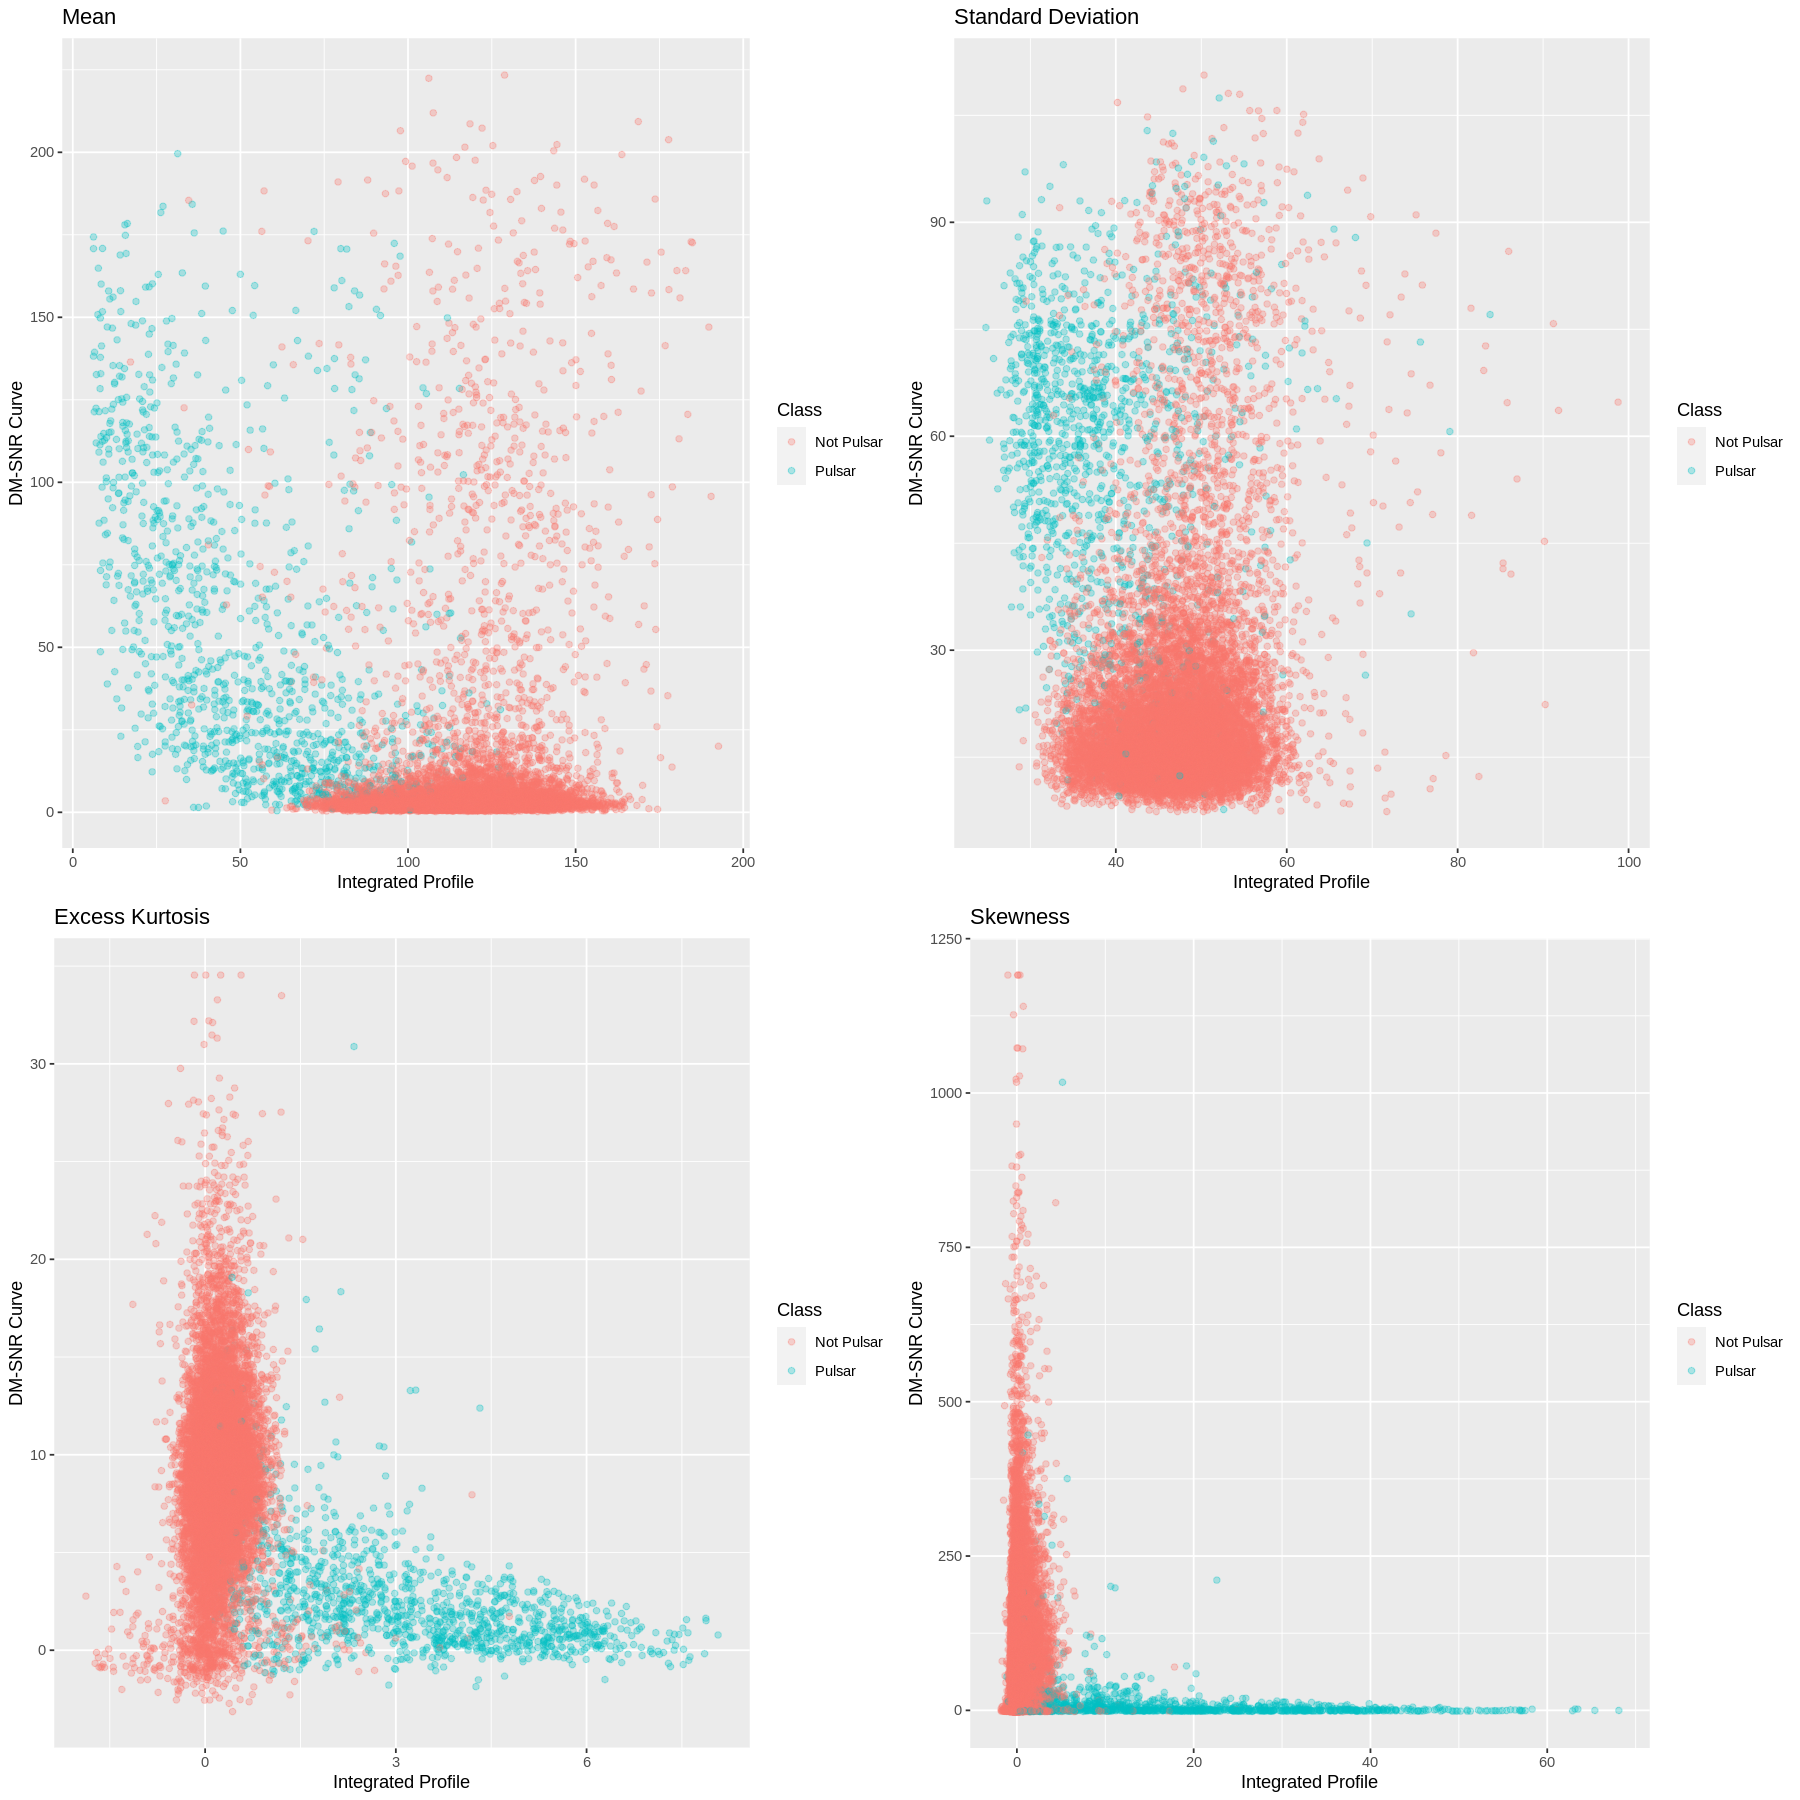

In [13]:
options(repr.plot.width = 15, repr.plot.height = 15)

pulsar_plot_mean <-  ggplot(training_pulsar_data, aes(x = int_prof_mean, 
                                        y = dm_snr_mean, 
                                        colour = class)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Integrated Profile",
                             y = "DM-SNR Curve",
                             title = "Mean",
                             colour = "Class") +
                        scale_color_hue(labels = c("Not Pulsar", "Pulsar"))

pulsar_plot_stan_dev <-  ggplot(training_pulsar_data, aes(x = int_prof_standard_deviation, 
                                                 y = dm_snr_standard_deviation, 
                                                 colour = class)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Integrated Profile",
                             y = "DM-SNR Curve",
                             title = "Standard Deviation",
                             colour = "Class") +
                        scale_color_hue(labels = c("Not Pulsar", "Pulsar"))

pulsar_plot_excess_kurtosis <-  ggplot(training_pulsar_data, aes(x = int_prof_excess_kurtosis, 
                                                        y = dm_snr_excess_kurtosis, 
                                                        colour = class)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Integrated Profile",
                             y = "DM-SNR Curve",
                             title = "Excess Kurtosis",
                             colour = "Class") +
                        scale_color_hue(labels = c("Not Pulsar", "Pulsar"))

pulsar_plot_skewness <-  ggplot(training_pulsar_data, aes(x = int_prof_skewness, 
                                                 y = dm_snr_skewness, 
                                                 colour = class)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Integrated Profile",
                             y = "DM-SNR Curve",
                             title = "Skewness",
                             colour = "Class") +
                        scale_color_hue(labels = c("Not Pulsar", "Pulsar"))

grid.arrange(pulsar_plot_mean,
             pulsar_plot_stan_dev,
             pulsar_plot_excess_kurtosis,
             pulsar_plot_skewness,
             ncol = 2)

## Methods
### Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
We will use all of the data in the dataset for our data analysis. Since each variable has a similar variable measured in a different method, we will first compare each pair of variables with respect to the classification of each observation. Afterwards, we will analyze the plots of each pair and decide to use those variables that seem to have an actual effect on the classification of each observation.

### Describe at least one way that you will visualize the results
We will be using a scatter plot to visualize the distribution of the 2 classes based on the variables that are of most importance to us based on previous tests.


## Expected outcomes and significance:
### What do you expect to find?
We expect to classify whether the body we are observing is a pulsar star based on the characteristics of the body and the radiation that it emits.
What impact could such findings have?
By trying to create a classification model for pulsar stars, there would be a chance to find a more accurate model to classify whether a body is a pulsar star or not. Consequently, this development would hasten the growth of science towards the outer universe which is currently light years away from us. Aside from the heavenly bodies beyond our solar system, being able to study extreme states of matter which is located light years away would allow us to learn of their properties and may give us a chance to replicate them here on earth which may bring technological advances due to their new properties.

### What future questions could this lead to?
What causes the distinct radio waves of a pulsar star?

What could the other non-pulsar star observations be besides background noise?

Are there other patterns within the data that could point to the existence of another entity we are unaware of?
